# TWO - WAY ANOVA

Two-way ANOVA (Analysis of Variance) is a statistical technique used to analyze the effects of two independent variables (factors) on a single dependent variable. It allows for the examination of main effects of each factor as well as their interaction effect. This is particularly useful when studying how different factors may independently or jointly influence the outcome variable.

### Question 1 :

A researcher is interested in studying the effects of both exercise intensity (low vs. high) and diet type (low-carb vs. high-carb) on weight loss.

They conduct an experiment where they randomly assign 40 participants to one of four groups: low-intensity/low-carb, low-intensity/high-carb, high-intensity/low-carb, and high-intensity/high-carb.
After 12 weeks, they measure the participants' weight loss in kilograms.

The weight loss data for each group are as follows:

Group                     | Participant 1 | Participant 2 | Participant 3 | Participant 4 | Participant 5 | Participant 6 | Participant 7 | Participant 8 | Participant 9 | Participant 10 |
-------------------------|---------------|---------------|---------------|---------------|---------------|---------------|---------------|---------------|---------------|----------------|
Low-intensity/low-carb   |       3       |       4       |       5       |       4       |       3       |       4       |       3       |       5       |       4       |        5        |
Low-intensity/high-carb  |       2       |       3       |       3       |       2       |       1       |       3       |       2       |       4       |       2       |        3        |
High-intensity/low-carb  |       4       |       5       |       6       |       5       |       4       |       6       |       5       |       7       |       5       |        6        |
High-intensity/high-carb |       3       |       4       |       4       |       3       |       2       |       4       |       3       |       5       |       3       |        4        |


#### Research Question:

``Does the combination of exercise intensity and diet type have a significant effect on weight loss?``

<br>

#### Hypotheses:

 ``Null Hypothesis (H0):`` There is no significant main effect of exercise intensity, no significant main effect of diet type, and no significant interaction effect between exercise intensity and diet type on weight loss.
<br><br> ``Alternative Hypothesis (H1):`` There is a significant main effect of exercise intensity, a significant main effect of diet type, and/or a significant interaction effect between exercise intensity and diet type on weight loss.

<br>

#### Variables:

Independent Variables:
        <br> <li> Exercise Intensity (low vs. high)
        <br> <li> Diet Type (low-carb vs. high-carb)
<br><br>Dependent Variable:
       <li> Weight Loss (in kilograms)


In [1]:
import math
import pandas as pd

#Preparing the data:
ACatScores1 = [8,10,12,8,7]
BCatScores2 = [12,11,9,14,4]
CCatScores3 = [18,12,16,6,8]
DCatScores4 = [13,9,12,16,15]

headers = ["A","B","C","D"]


scores1 = list(ACatScores1)
scores2 = list(BCatScores2)
scores3 = list(CCatScores3)
scores4 = list(DCatScores4)

scores = [scores1, scores2, scores3,scores4]

print(scores)
print(" ---------------------------------- ")
print(pd.DataFrame(scores,headers).T)

[[8, 10, 12, 8, 7], [12, 11, 9, 14, 4], [18, 12, 16, 6, 8], [13, 9, 12, 16, 15]]
 ---------------------------------- 
    A   B   C   D
0   8  12  18  13
1  10  11  12   9
2  12   9  16  12
3   8  14   6  16
4   7   4   8  15


### Question 2 :

Suppose you want to determine whether the brand of laundry detergent used and the temperature affects the amount of dirt removed from your laundry. To this end, you buy two different brand of detergent (**X** and **Y**) and choose three different temperature levels (**cold**, **warm**, and **hot**). 

Then you divide your laundry randomly into $6 \times r$ piles of equal size and assign each $r$ piles into the combination of (**X** and **Y**) and (**cold**,**warm**, and **hot**). In this example, we are interested in testing Null Hypotheses:

  $H_0^D$: The amount of dirt removed does not depend on the type of detergent

  $H_0^T$: The amount of drt removed does not depend on the temperature

The experiment has two factors (Factor Detergent, Factor Temperature) at $a = 2$ (X and Y) and $b = 3$ (cold, warm, and hot) levels. 

Thus there are $ab = 3 \times 2 = 6$ different combinations of detergent and temperature. With each combination you wash $r = 5$ loads. $r$ is called the number of replicates. This sums up to $n = abr = 30$ loads in total. 

The amounts $Y_{ijk}$ of dirt removed when washing sub pile $k$ ($k = 1, 2, 3, 4, 5$) with detergent $i$ ($i = 1, 2$) at temperature $j$ ($j = 1, 2, 3$) are recorded in Table


| Detergent \ WaterTemp | Cold | Warm | Hot |
--------------------- | ---- | ---- | --- |
| Detergent X           | 4    | 7    | 10  |
|       ‎                  | 5    | 8    | 11  |
|         ‎                | 5    | 9    | 12  |
|        ‎                 | 6    | 12   | 19  |
|        ‎                 | 5    | 3    | 15  |
--------------------- | ---- | ---- | --- |
|Detergent Y           | 4    | 12   | 10  |
|        ‎                 | 4    | 12   | 12  |
|         ‎                | 6    | 13   | 13  |
 |         ‎               | 6    | 15   | 13  |
  |          ‎             | 5    | 13   | 12  |




<br>

In [2]:
import numpy as np
import pandas as pd

headers = ["Cold","Warm","Hot"]
cold = [4, 5, 5, 6, 5, 4, 4, 6, 6, 5]
warm = [7, 8, 9, 12, 3, 12, 12, 13, 15, 13]
hot = [10, 11, 12, 19, 15, 10, 12, 13, 13, 12]

scores = [cold,warm,hot]
index_labels = ["Detergent X"] * 5 + ["Detergent Y"] * 5

df = pd.DataFrame(scores).T
df.index = index_labels
df.columns= headers
df

,Cold,Warm,Hot
Detergent X,4,7,10
Detergent X,5,8,11
Detergent X,5,9,12
Detergent X,6,12,19
Detergent X,5,3,15
Detergent Y,4,12,10
Detergent Y,4,12,12
Detergent Y,6,13,13
Detergent Y,6,15,13
Detergent Y,5,13,12


### Mathematical Step by Step Calculation of Two-Way Anova:

(Once you have taken your data in 'scores')

In [3]:
grouped_df = df.groupby(level=0)
grouped_df

k = len(grouped_df)     #Rows_categories
j = len(df.columns)     #Col_categories

print("Row Categories : " ,k)
print("Column Categories : ",j)

r = k * j   #Number of groups present
print("Number of Groups : ",r)

Row Categories :  2
Column Categories :  3
Number of Groups :  6


In [4]:
contents = {}

for name, group in grouped_df:
    contents[name] = group


Divide your dataset on the basis of Rowise Categories:

In [5]:
contents["Detergent X"] # Change this for your data

,Cold,Warm,Hot
Detergent X,4,7,10
Detergent X,5,8,11
Detergent X,5,9,12
Detergent X,6,12,19
Detergent X,5,3,15


In [6]:
contents["Detergent Y"] # Change this for your data

,Cold,Warm,Hot
Detergent Y,4,12,10
Detergent Y,4,12,12
Detergent Y,6,13,13
Detergent Y,6,15,13
Detergent Y,5,13,12


In [7]:
rs = []    #List to store the sums of each row grp
cs = []    #List to store the sums of each column grp

for value in contents:
    rs.append(sum(list(contents[value].sum())))

rs

[131, 150]

In [8]:
cs = df.sum()
cs = list(cs)
cs

[50, 104, 127]

In [9]:
sum(rs),sum(cs) #These will be the same

(281, 281)

In [10]:
ns = sum(list(df.count()))
ns     #Variable to store the total Observations.

30

In [11]:
a = 0      #Variable to store the number of observations in a Column group
b = 0      #Variable to store the number of observations in a Row group

for value in contents:
    b = contents[value].shape[0] * contents[value].shape[1]
    a = a + contents[value].shape[0]

a,b

(10, 15)

\begin{equation}
C_x = \frac{(\sum\limits_{i=1}^{n} X_i)^2}{No. of Observations}
\end{equation}

In [12]:
Cx = sum(cs)**2/ns
Cx    #Correction Term

2632.0333333333333

\begin{equation}
SS_T = \sum_{}^{} X_i^2 - C_x
\end{equation}

In [13]:
SSt = 0    #Variable to Store SSt
ssx = 0    #Variable to Store summation of X²

for index, row in df.iterrows():
  for value in row:
    ssx = ssx + value**2

SSt = ssx - Cx
SSt

498.9666666666667

\begin{equation}
SS_C = \frac{\sum_{i = 1}^{Total Columns} Col_i^2}{a} - C_x
\end{equation}

In [14]:
SSc = 0  #Variable to store SSc
sc = 0   #Variable to Store colwise sum squares


for col in cs:
  sc = sc + col**2

SSc = sc/a - Cx
SSc

312.4666666666667

\begin{equation}
SS_R = \frac{\sum_{i = 1}^{Rows} Row_i^2}{b} - C_x
\end{equation}

In [15]:
SSr = 0  #Variable to store SSr
sr = 0   #Variable to Store rowwise sum squares


for row in rs:
  sr = sr + row**2

SSr = sr/b - Cx
SSr

12.033333333333303


\begin{equation*}
SS_G = \frac{\sum\sum X_g^2}{r} - C_x - SS_C - SS_R
\end{equation*}


In [16]:
gs = []   #Variable to store sums in groups

for value in contents:
    gs.append(list(contents[value].sum()))

gs = [item for sublist in gs for item in sublist]
gs

[25, 39, 67, 25, 65, 60]

In [17]:
SSg = 0  #Variable to store SSg
sg = 0   #Variable to Store groupwise sum squares


for g in gs:
  sg = sg + g**2

SSg = sg/r - Cx - SSc - SSr
SSg

-442.3666666666668


\begin{equation*}
SS_E = SS_T - SS_C - SS_R - SS_G
\end{equation*}


In [18]:
SSe = SSt - SSc - SSr - SSg
SSe

616.8333333333335

Source                 | Degree of Freedom |
-------------------------|---------------|
Columnwise  |       (C - 1)      |     
Rowise  |       (R - 1)       |    
Interaction |       (C - 1) x (R - 1)      |  
Residual |       C x R x (n - 1)       |
Total |       (N - 1)       |       

<br>
<li>n = No. of items in a group
<li>N = Total items overall
<li>C = Total Column Categories
<li>R = Total Rows Categories


In [19]:
inference_df = pd.DataFrame()
inference_df["Source"] = ["Columnwise","Rowwise","Interaction","Residual","Total"]
inference_df["Degree of Freedom"] = [j-1,k-1,(k-1)*(j-1),k * j * (a/k - 1),ns-1]      #(n-1) can be written as a/k - 1 (No. of obs columnwise / categories row wise)
inference_df["SS"] = [SSc,SSr,SSg,SSe,SSt]
inference_df = inference_df.set_index("Source")
inference_df

,Degree of Freedom,SS
Source,,
Columnwise,2.0,312.466667
Rowwise,1.0,12.033333
Interaction,2.0,-442.366667
Residual,24.0,616.833333
Total,29.0,498.966667


In [20]:
inference_df["Mean of SSx (SS/df)"] = inference_df["SS"] / inference_df["Degree of Freedom"]
inference_df

,Degree of Freedom,SS,Mean of SSx (SS/df)
Source,,,
Columnwise,2.0,312.466667,156.233333
Rowwise,1.0,12.033333,12.033333
Interaction,2.0,-442.366667,-221.183333
Residual,24.0,616.833333,25.701389
Total,29.0,498.966667,17.205747


In [21]:
inference_df["F Ratio (MSSx/MSSe)"] = inference_df["Mean of SSx (SS/df)"] / inference_df["Mean of SSx (SS/df)"]["Residual"]
inference_df

,Degree of Freedom,SS,Mean of SSx (SS/df),F Ratio (MSSx/MSSe)
Source,,,,
Columnwise,2.0,312.466667,156.233333,6.078790
Rowwise,1.0,12.033333,12.033333,0.468198
Interaction,2.0,-442.366667,-221.183333,-8.605890
Residual,24.0,616.833333,25.701389,1.000000
Total,29.0,498.966667,17.205747,0.669448


scipy.stats.f.ppf() is a function from the SciPy library's stats module used to compute the percent point function (inverse of the cumulative distribution function) of the F-distribution.

### F- Table:



| dfb/dfw | 1     | 2     | 3     | 4     | 5     | 6     | 7     | 8     | 9     | 10    | 20    | 30    | 40    | 50    | 100   |
|---------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| 1       | 161.4 | 199.5 | 215.7 | 224.6 | 230.2 | 233.9 | 236.8 | 238.9 | 240.4 | 241.5 | 254.3 | 257.3 | 259.4 | 260.9 | 265.7 |
| 2       | 18.5  | 19.0  | 19.2  | 19.3  | 19.3  | 19.4  | 19.4  | 19.5  | 19.5  | 19.6  | 19.8  | 19.8  | 19.9  | 19.9  | 20.1  |
| 3       | 10.1  | 9.6   | 9.3   | 9.1   | 9.0   | 8.9   | 8.8   | 8.7   | 8.6   | 8.6   | 8.3   | 8.2   | 8.1   | 8.0   | 7.7   |
| 4       | 7.7   | 6.9   | 6.6   | 6.4   | 6.3   | 6.2   | 6.1   | 6.0   | 5.9   | 5.8   | 5.4   | 5.2   | 5.1   | 5.0   | 4.6   |
| 5       | 6.6   | 5.8   | 5.4   | 5.2   | 5.1   | 5.0   | 4.9   | 4.8   | 4.7   | 4.6   | 4.2   | 4.0   | 3.9   | 3.8   | 3.3   |
| 6       | 6.0   | 5.1   | 4.8   | 4.5   | 4.4   | 4.3   | 4.2   | 4.1   | 4.0   | 3.9   | 3.4   | 3.2   | 3.1   | 3.0   | 2.5   |
| 7       | 5.5   | 4.7   | 4.3   | 4.0   | 3.9   | 3.8   | 3.7   | 3.6   | 3.5   | 3.4   | 2.9   | 2.7   | 2.6   | 2.5   | 1.9   |
| 8       | 5.3   | 4.5   | 4.1   | 3.8   | 3.7   | 3.6   | 3.5   | 3.4   | 3.3   | 3.2   | 2.7   | 2.5   | 2.4   | 2.3   | 1.7   |
| 9       | 5.1   | 4.3   | 3.9   | 3.6   | 3.5   | 3.4   | 3.3   | 3.2   | 3.1   | 3.0   | 2.5   | 2.3   | 2.2   | 2.1   | 1.5   |
| 10      | 5.0   | 4.1   | 3.7   | 3.5   | 3.3   | 3.2   | 3.1   | 3.0   | 2.9   | 2.8   | 2.3   | 2.1   | 2.0   | 1.9   | 1.3   |

<br>
The F-table, also known as the F-distribution table, is a statistical reference table used in hypothesis testing, specifically in the context of analysis of variance (ANOVA) and regression analysis. The F-table provides critical values of the F-statistic for different levels of significance and degrees of freedom.


In [22]:
import scipy

alpha = 1-.05  #represents the significance level

f_crit_c = scipy.stats.f.ppf(alpha,inference_df["Degree of Freedom"]["Columnwise"],inference_df["Degree of Freedom"]["Residual"])
f_crit_r = scipy.stats.f.ppf(alpha,inference_df["Degree of Freedom"]["Rowwise"],inference_df["Degree of Freedom"]["Residual"])
f_crit_i = scipy.stats.f.ppf(alpha,inference_df["Degree of Freedom"]["Interaction"],inference_df["Degree of Freedom"]["Residual"])


inference_df["F Critical"] = [f_crit_c,f_crit_r,f_crit_i,np.nan,np.nan]
inference_df = inference_df.iloc[:-2]
inference_df = inference_df[["Degree of Freedom","F Ratio (MSSx/MSSe)","F Critical"]]
inference_df

,Degree of Freedom,F Ratio (MSSx/MSSe),F Critical
Source,,,
Columnwise,2.0,6.078790,3.402826
Rowwise,1.0,0.468198,4.259677
Interaction,2.0,-8.605890,3.402826


In [23]:
for source,i in inference_df.iterrows():
  if i["F Ratio (MSSx/MSSe)"] > i["F Critical"]:
    print(f"{source} Does have affect")
  else:
    print(f"{source} No affect")

Columnwise Does have affect
Rowwise No affect
Interaction No affect


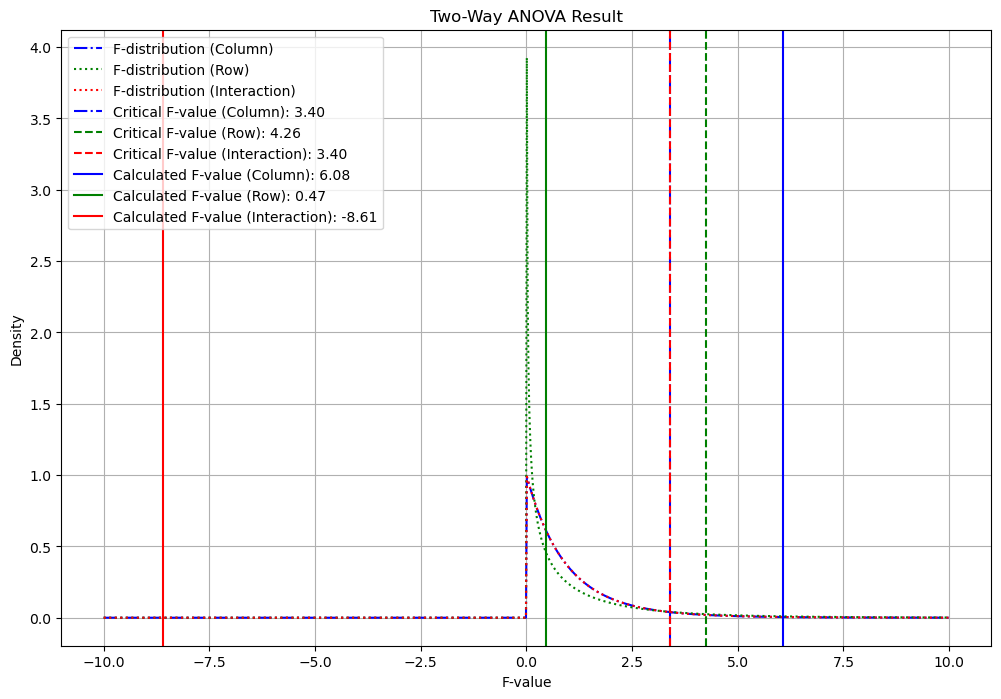

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

# Define the x range for the F-distribution curves
x = np.linspace(-10, 10, 1000)

# Extract the degrees of freedom and F-values from the inference dataframe
df_col = int(inference_df.loc['Columnwise', 'Degree of Freedom'])
df_row = int(inference_df.loc['Rowwise', 'Degree of Freedom'])
df_interaction = int(inference_df.loc['Interaction', 'Degree of Freedom'])

f_col = inference_df.loc['Columnwise', 'F Ratio (MSSx/MSSe)']
f_row = inference_df.loc['Rowwise', 'F Ratio (MSSx/MSSe)']
f_interaction = inference_df.loc['Interaction', 'F Ratio (MSSx/MSSe)']

f_crit_col = inference_df.loc['Columnwise', 'F Critical']
f_crit_row = inference_df.loc['Rowwise', 'F Critical']
f_crit_interaction = inference_df.loc['Interaction', 'F Critical']

# Calculate the dfw
dfw = k * j * (a/k - 1)

# Calculate the F-distribution curves for column, row, and interaction effects
f_distribution_col = stats.f.pdf(x, df_col, dfw)
f_distribution_row = stats.f.pdf(x, df_row, dfw)
f_distribution_interaction = stats.f.pdf(x, df_interaction, dfw)

# Plot the F-distribution curves
plt.figure(figsize=(12, 8))
plt.plot(x, f_distribution_col, color ='blue', linestyle='-.', label='F-distribution (Column)')
plt.plot(x, f_distribution_row, color = 'green', linestyle=':', label='F-distribution (Row)')
plt.plot(x, f_distribution_interaction, color = 'red', linestyle=':', label='F-distribution (Interaction)')

# Plot the critical F-values with dashed lines
plt.axvline(x=f_crit_col, color='blue', linestyle='-.', label=f'Critical F-value (Column): {f_crit_col:.2f}')
plt.axvline(x=f_crit_row, color='green', linestyle='--', label=f'Critical F-value (Row): {f_crit_row:.2f}')
plt.axvline(x=f_crit_interaction, color='red', linestyle='--', label=f'Critical F-value (Interaction): {f_crit_interaction:.2f}')

# Plot the calculated F-values with solid lines
plt.axvline(x=f_col, color='blue', linestyle='-', label=f'Calculated F-value (Column): {f_col:.2f}')
plt.axvline(x=f_row, color='green', linestyle='-', label=f'Calculated F-value (Row): {f_row:.2f}')
plt.axvline(x=f_interaction, color='red', linestyle='-', label=f'Calculated F-value (Interaction): {f_interaction:.2f}')

plt.title('Two-Way ANOVA Result')
plt.xlabel('F-value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


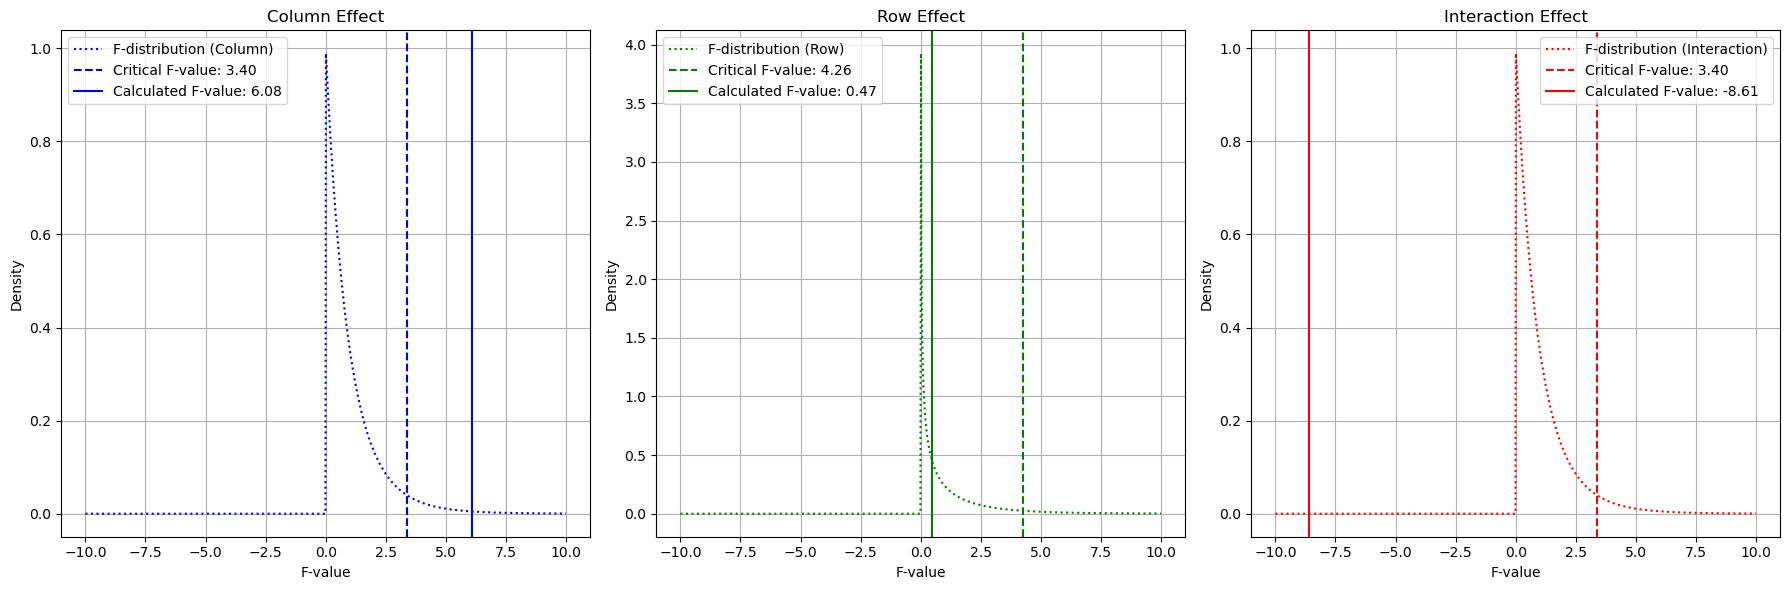

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

# Define the x range for the F-distribution curves
x = np.linspace(-10, 10, 1000)

# Extract the degrees of freedom and F-values from the inference dataframe
df_col = int(inference_df.loc['Columnwise', 'Degree of Freedom'])
df_row = int(inference_df.loc['Rowwise', 'Degree of Freedom'])
df_interaction = int(inference_df.loc['Interaction', 'Degree of Freedom'])

f_col = inference_df.loc['Columnwise', 'F Ratio (MSSx/MSSe)']
f_row = inference_df.loc['Rowwise', 'F Ratio (MSSx/MSSe)']
f_interaction = inference_df.loc['Interaction', 'F Ratio (MSSx/MSSe)']

f_crit_col = inference_df.loc['Columnwise', 'F Critical']
f_crit_row = inference_df.loc['Rowwise', 'F Critical']
f_crit_interaction = inference_df.loc['Interaction', 'F Critical']

# Calculate the dfw
dfw = k * j * (a/k - 1)

# Calculate the F-distribution curves for column, row, and interaction effects
f_distribution_col = stats.f.pdf(x, df_col, dfw)
f_distribution_row = stats.f.pdf(x, df_row, dfw)
f_distribution_interaction = stats.f.pdf(x, df_interaction, dfw)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Column effect
axes[0].plot(x, f_distribution_col, 'b-', linestyle=':', label='F-distribution (Column)')
axes[0].axvline(x=f_crit_col, color='blue', linestyle='--', label=f'Critical F-value: {f_crit_col:.2f}')
axes[0].axvline(x=f_col, color='blue', linestyle='-', label=f'Calculated F-value: {f_col:.2f}')
axes[0].set_title('Column Effect')
axes[0].set_xlabel('F-value')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True)

# Plot for Row effect
axes[1].plot(x, f_distribution_row, 'g-', linestyle=':', label='F-distribution (Row)')
axes[1].axvline(x=f_crit_row, color='green', linestyle='--', label=f'Critical F-value: {f_crit_row:.2f}')
axes[1].axvline(x=f_row, color='green', linestyle='-', label=f'Calculated F-value: {f_row:.2f}')
axes[1].set_title('Row Effect')
axes[1].set_xlabel('F-value')
axes[1].set_ylabel('Density')
axes[1].legend()
axes[1].grid(True)

# Plot for Interaction effect
axes[2].plot(x, f_distribution_interaction, 'r-', linestyle=':', label='F-distribution (Interaction)')
axes[2].axvline(x=f_crit_interaction, color='red', linestyle='--', label=f'Critical F-value: {f_crit_interaction:.2f}')
axes[2].axvline(x=f_interaction, color='red', linestyle='-', label=f'Calculated F-value: {f_interaction:.2f}')
axes[2].set_title('Interaction Effect')
axes[2].set_xlabel('F-value')
axes[2].set_ylabel('Density')
axes[2].legend()
axes[2].grid(True)

# Show plot
plt.tight_layout()
plt.show()


### Pingouin

The Pingouin package in Python provides a convenient way to perform ANOVA analysis, including one-way, two-way, and mixed ANOVA.

After running the ANOVA analysis, Pingouin provides output including the F-value, p-value, and effect size, which can be used to assess the significance of the observed differences between groups.

In [26]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
from pingouin import anova


# Given data
data = {
    "Cold": [4, 5, 5, 6, 5] + [4, 4, 6, 6, 5],
    "Warm": [7, 8, 9, 12, 3] + [12, 12, 13, 15, 13],
    "Hot": [10, 11, 12, 19, 15] + [10, 12, 13, 13, 12]
}

# Create DataFrame
df = pd.DataFrame(data)
df["Labels"] = ["X"]*5 + ["Y"]*5
df


,Cold,Warm,Hot,Labels
0,4,7,10,X
1,5,8,11,X
2,5,9,12,X
3,6,12,19,X
4,5,3,15,X
5,4,12,10,Y
6,4,12,12,Y
7,6,13,13,Y
8,6,15,13,Y
9,5,13,12,Y


In [28]:
df_melt = df.melt(id_vars='Labels', var_name='Temperature', value_name='Scores')
df_melt

,Labels,Temperature,Scores
0,X,Cold,4
1,X,Cold,5
2,X,Cold,5
3,X,Cold,6
4,X,Cold,5
5,Y,Cold,4
6,Y,Cold,4
7,Y,Cold,6
8,Y,Cold,6
9,Y,Cold,5


In [29]:

# Perform two-way ANOVA
result = anova(data=df_melt, dv='Scores', between=['Temperature', 'Labels'])


# Print result
result

,Source,SS,DF,MS,F,p-unc,np2
0,Temperature,312.466667,2,156.233333,32.891228,1.331181e-07,0.732687
1,Labels,12.033333,1,12.033333,2.533333,1.245517e-01,0.095477
2,Temperature * Labels,60.466667,2,30.233333,6.364912,6.057712e-03,0.346580
3,Residual,114.000000,24,4.750000,NaN,NaN,NaN


ANOVA summary:

- 'Source': Factor names
- 'SS': Sums of squares
- 'DF': Degrees of freedom
- 'MS': Mean squares
- 'F': F-values
- 'p-unc': uncorrected p-values
- 'np2': Partial eta-square effect sizes